In [1]:
from google.colab import drive
drive.mount('/content/gdive')

Mounted at /content/gdive


In [15]:
path = '/content/gdive/MyDrive/Machine Learning Sem3/Tugas7'

In [17]:
import pandas as pd

# membaca file csv menggunakan pandas
df = pd.read_csv(path + '/Data/apples_and_oranges.csv', sep=';')

# cetak header data (5 baris data) dari file
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [19]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [21]:
X = df[['Weight', 'Size']]

# Kolom target (label)
y = df ['Class']

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Membuat model SVM dengan kernel linear
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [23]:
y_pred = model.predict(X_test)
# Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100 :.2f}%")
# Laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 100.00%

Laporan Klasifikasi:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8




Confusion Matrix:
 [[3 0]
 [0 5]]


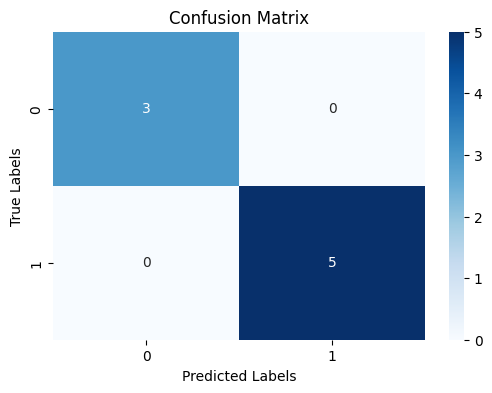

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred) )

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

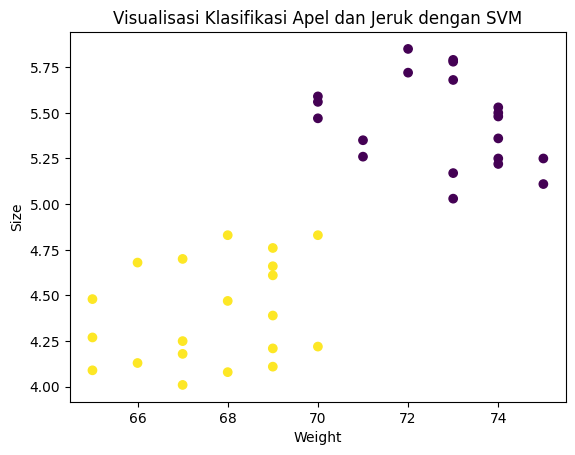

In [27]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to numerical labels
label_encoder = LabelEncoder()
df['Class_encoded'] = label_encoder.fit_transform(df['Class'])

# Visualisasi hubungan antara Usia dan Penghasilan, dengan warna menunjukkan Beli_Mobil
plt.scatter(df['Weight'], df['Size'], c=df['Class_encoded'])
plt.xlabel('Weight')
plt.ylabel('Size')
plt.title('Visualisasi Klasifikasi Apel dan Jeruk dengan SVM')
plt.show()

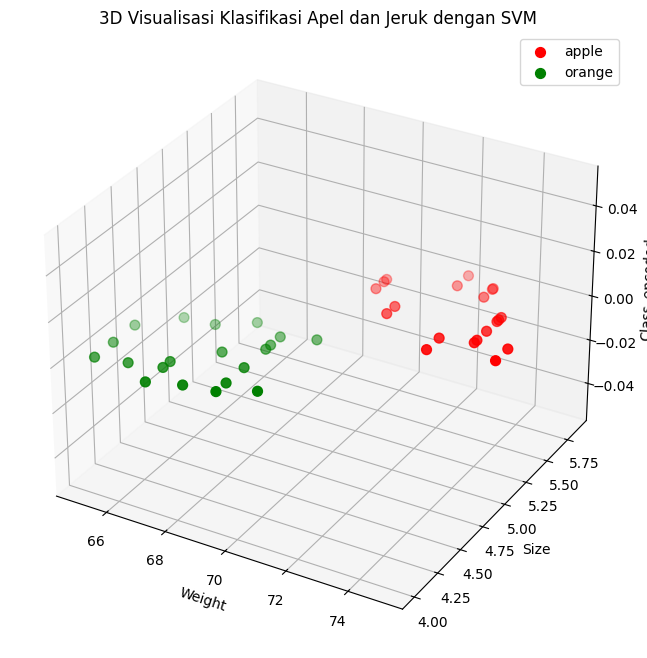

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Visualisasi 3D data calon pembeli mobil
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas (0 = apple, 1 = orange) based on LabelEncoder
colors = ['r', 'g']
labels = ['apple', 'orange']

# Plot tiap kelas dengan warna berbeda
for i, label in enumerate(labels):
    subset = df[df['Class'] == label]
    ax.scatter(
        subset['Weight'],
        subset['Size'],
        color=colors[i],
        label=label,
        s=50
    )

ax.set_xlabel('Weight')
ax.set_ylabel('Size')
ax.set_zlabel('Class_encoded')
ax.set_title('3D Visualisasi Klasifikasi Apel dan Jeruk dengan SVM')
ax.legend()
plt.show()